In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


from qiskit import QuantumCircuit
import qiskit.quantum_info as qi


from hamming import *
from losstre import *

from tqdm import trange

In [2]:
N_xi, N_features = 6, 8
xi = np.random.randint(2, size=(N_xi, N_features))
xi[ xi == 0 ] = -1   # data is encoded as +- 1

labels = np.ones((N_features, ))

print(xi.shape)

(6, 8)


In [3]:
HH = Hamming(n_qubit = 8, n_ancillary = 4, dataset = xi)

qc = QuantumCircuit( HH.n_qubit + HH.n_ancillary )

# init the circuit state
for ii in range(HH.n_qubit):  qc.h(ii)

qc.x(8+3)

mystates = []
mystates.append( get_statevec(qc, HH.n_qubit) )

#qc.barrier()

In [4]:
qc.draw()

┌───┐
 q_0: ┤ H ├
      ├───┤
 q_1: ┤ H ├
      ├───┤
 q_2: ┤ H ├
      ├───┤
 q_3: ┤ H ├
      ├───┤
 q_4: ┤ H ├
      ├───┤
 q_5: ┤ H ├
      ├───┤
 q_6: ┤ H ├
      ├───┤
 q_7: ┤ H ├
      └───┘
 q_8: ─────
           
 q_9: ─────
           
q_10: ─────
      ┌───┐
q_11: ┤ X ├
      └───┘

In [5]:
P = 100
dt = 1

for pp in trange(20):
    s_p = (pp+1)/P
    gamma_p = s_p*dt
    beta_p = (1-s_p)*dt

    for mu in range( HH.data_size ):
        qc = HH.hamming_circuit_for_sample(mu, qc = qc)
        HH.control_unitaries(mu, gamma = gamma_p, qc = qc) # FIXME
        #for jj in range( HH.n_qubit ):
        #    #qc.rz(-2*gamma_p*HH.dataset[mu, jj]/np.sqrt(HH.n_qubit), jj)
        #    #qc.cp(-2*gamma_p*HH.dataset[mu, jj]/np.sqrt(HH.n_qubit), jj, 11)
        #    #qc.cu(0, 2*gamma_p*HH.dataset[mu, jj]/np.sqrt(HH.n_qubit), 0, gamma_p*HH.dataset[mu, jj]/np.sqrt(HH.n_qubit), 11, jj)
        


    # apply Ux
    for ii in range( HH.n_qubit ):
    #    # syntax:  lambda, control_qubit, target_qubit
        qc.u( 2 * beta_p, math.pi/2, -math.pi/2, ii)

    # measure loss
    mystates.append( get_statevec(qc, HH.n_qubit) )

100%|██████████| 20/20 [00:10<00:00,  1.99it/s]


In [6]:
#mystates.append( get_statevec(qc, HH.n_qubit) )

In [7]:
res = get_losses_from_sts(mystates, HH.dataset, labels, representation='buh')

Constructing H_perc: 100%|██████████| 6/6 [00:00<00:00, 189.37it/s]


In [8]:
mystates[-1]

array([-1.34441069e-17+9.61923349e-02j,  9.34234001e-02-1.13624388e-16j,
       -9.90433369e-02+1.32706346e-16j, -1.95156391e-17+9.61923349e-02j,
       -9.90433369e-02-2.60208521e-18j,  4.77048956e-18+9.61923349e-02j,
        1.56125113e-17-1.01978839e-01j, -9.90433369e-02+2.21177243e-17j,
       -2.80996839e-03+1.44740990e-17j,  1.29562160e-17+2.72908233e-03j,
       -1.63172427e-17-2.89325180e-03j, -2.80996839e-03+1.02321580e-17j,
       -1.01101853e-17-2.89325180e-03j, -2.80996839e-03+1.40539707e-17j,
        2.97900361e-03-1.43521263e-17j, -1.44063364e-17-2.89325180e-03j,
        7.60978321e-02-8.63400860e-03j, -8.38547521e-03-7.39073256e-02j,
        8.88990816e-03+7.83532620e-02j,  7.60978321e-02-8.63400860e-03j,
        8.88990816e-03+7.83532620e-02j,  7.60978321e-02-8.63400860e-03j,
       -8.06755397e-02+9.15339221e-03j,  8.88990816e-03+7.83532620e-02j,
        2.52216471e-04+2.22296821e-03j,  2.15897918e-03-2.44956319e-04j,
       -2.28885378e-03+2.59691803e-04j,  2.52216471

/home/baronefr/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


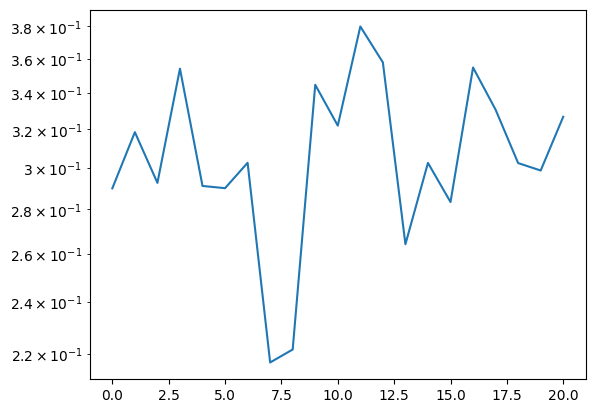

In [9]:
plt.plot(res)
plt.yscale('log')

In [11]:
#qc.draw()